In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
titanic_data = pd.read_csv('data/train.csv')

In [29]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


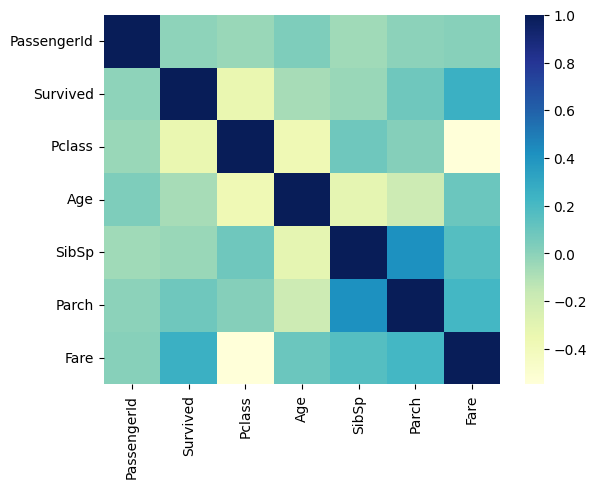

In [28]:
sns.heatmap(titanic_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

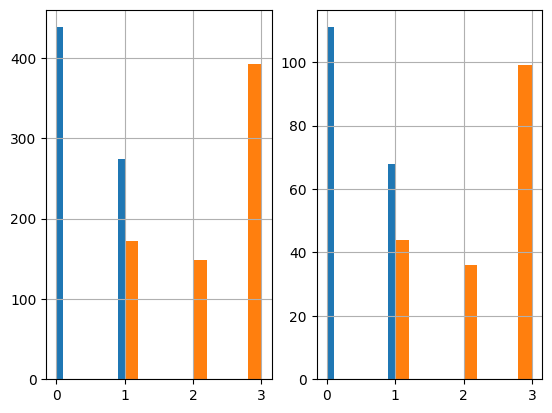

In [44]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

In [45]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 311 to 511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        imputer = SimpleImputer(strategy="mean")
        x['Age'] = imputer.fit_transform(x[['Age']])
        return x

In [55]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(x[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]

        return x

In [56]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return x.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [57]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [58]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [59]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
311,312,1,1,18.000000,2,2,262.375,1.0,0.0,0.0,1.0,0.0
808,809,0,2,39.000000,0,0,13.000,0.0,0.0,1.0,0.0,1.0
356,357,1,1,22.000000,0,1,55.000,0.0,0.0,1.0,1.0,0.0
319,320,1,1,40.000000,1,1,134.500,1.0,0.0,0.0,1.0,0.0
761,762,0,3,41.000000,0,0,7.125,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
528,529,0,3,39.000000,0,0,7.925,0.0,0.0,1.0,0.0,1.0
439,440,0,2,31.000000,0,0,10.500,0.0,0.0,1.0,0.0,1.0
712,713,1,1,48.000000,1,0,52.000,0.0,0.0,1.0,0.0,1.0
317,318,0,2,54.000000,0,0,14.000,0.0,0.0,1.0,0.0,1.0


In [60]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 311 to 511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [61]:
from sklearn.preprocessing import StandardScaler

x = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500, 1000], "max_depth": [None, 5, 10, 20], "min_samples_split": [2,3,4,5,6]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 20],
                          'min_samples_split': [2, 3, 4, 5, 6],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [72]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [73]:
strat_test_set = pipeline.fit_transform(strat_test_set)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [65]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
496,497,1,1,54.0,1,0,78.2667,1.0,0.0,0.0,1.0,0.0
194,195,1,1,44.0,0,0,27.7208,1.0,0.0,0.0,1.0,0.0
555,556,0,1,62.0,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
786,787,1,3,18.0,0,0,7.4958,0.0,0.0,1.0,1.0,0.0
473,474,1,2,23.0,0,0,13.7917,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,1,2,24.0,2,1,27.0000,0.0,0.0,1.0,1.0,0.0
499,500,0,3,24.0,0,0,7.7958,0.0,0.0,1.0,0.0,1.0
6,7,0,1,54.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
628,629,0,3,26.0,0,0,7.8958,0.0,0.0,1.0,0.0,1.0


In [74]:
x_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
x_data_test = scaler.fit_transform(x_test)
y_data_test = y_test.to_numpy()

In [75]:
final_clf.score(x_data_test, y_data_test)

0.8156424581005587

In [77]:
final_data = pipeline.fit_transform(titanic_data)

In [78]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [80]:
x_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()

In [81]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500, 1000], "max_depth": [None, 5, 10, 20], "min_samples_split": [2,3,4,5,6]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(x_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 20],
                          'min_samples_split': [2, 3, 4, 5, 6],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [82]:
prod_final_clf = grid_search.best_estimator_

In [83]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [84]:
titanic_test_data = pd.read_csv("data/test.csv")

In [85]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [86]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [90]:
x_final_test = final_test_data
x_final_test = x_final_test.ffill()

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

In [92]:
 prediction = prod_final_clf.predict(x_data_final_test)

In [97]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = prediction
final_df.to_csv("data/predictions.csv", index=False)

In [99]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
